In [64]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections
import community.community_louvain as community_louvain
import mpl_toolkits

In [65]:
# !pip install community
# !pip install networkx
# !pip install python-louvain
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [66]:
data = pd.read_csv("./Data/student_all.csv")

In [67]:
data.rename(columns={"sex":"gender"}, inplace=True)

In [68]:
data.drop(columns='Unnamed: 0', inplace=True)

In [69]:
data['alc'] = data['Dalc'] + data['Walc']

In [70]:
indexes = [i for i in range(data.shape[0])]
indexes = pd.DataFrame({"Names":indexes})
indexes
data = pd.concat([data, indexes], axis=1)

In [71]:
data["guardian"][data["guardian"] == "father"] = "parent"
data["guardian"][data["guardian"] == "mother"] = "parent"

C:\Users\Marin\AppData\Local\Temp/ipykernel_2188/3828257580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "father"] = "parent"
C:\Users\Marin\AppData\Local\Temp/ipykernel_2188/3828257580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["guardian"][data["guardian"] == "mother"] = "parent"


In [72]:
data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1

C:\Users\Marin\AppData\Local\Temp/ipykernel_2188/2866260647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['absences'][(data["absences"] > 0) & (data["absences"] < 11)] = 1


In [73]:
data["guardian"].unique()

array(['parent', 'other', '2', '3'], dtype=object)

In [74]:
data.head(10)

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,course,alc,Names
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,1,5,6,6.0,mat,2,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,1,5,5,6.0,mat,2,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,1,7,8,10.0,mat,5,2
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,1,15,14,15.0,mat,2,3
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,1,6,10,10.0,mat,3,4
5,GP,M,16,U,LE3,T,4,3,services,other,...,1,2,5,1,15,15,15.0,mat,3,5
6,GP,M,16,U,LE3,T,2,2,other,other,...,1,1,3,0,12,12,11.0,mat,2,6
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,1,1,1,6,5,6.0,mat,2,7
8,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,1,0,16,18,19.0,mat,2,8
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,5,0,14,15,15.0,mat,2,9


In [75]:
data.shape

(1046, 36)

In [76]:
data.columns

Index(['school', 'gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'course', 'alc',
       'Names'],
      dtype='object')

In [77]:
# To install a package in a Jupyter Notebook
# !pip install *package name*

In [78]:
data_vec = data.to_numpy()

In [79]:
data_vec.shape

(1046, 36)

In [80]:
data_vec

array([['GP', 'F', '18', ..., 'mat', 2, 0],
       ['GP', 'F', '17', ..., 'mat', 2, 1],
       ['GP', 'F', '15', ..., 'mat', 5, 2],
       ...,
       ['MS', 'M', '18', ..., 'por', 7, 1043],
       ['M', '23', 'U', ..., nan, 8, 1044],
       ['F', '22', 'U', ..., nan, 6, 1045]], dtype=object)

In [81]:
data_vec[1, :]

array(['GP', 'F', '17', 'U', 'GT3', 'T', 1, '1', 'at_home', 'other',
       'course', 'parent', 1, 2, '0', 'no', 'yes', 'no', 'no', 'no',
       'yes', 'yes', 'no', 5, 3, 3, 1, 1, 3, 1, 5, 5, 6.0, 'mat', 2, 1],
      dtype=object)

In [82]:
data_vec[1, 1] == data_vec[1, 1]

True

In [83]:
data_vec.shape

(1046, 36)

In [84]:
G = nx.Graph()

In [85]:
# TODO: Define a threshold
# lim -> 0 similare
# lim -> infinite different
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        for col in range(data_vec.shape[1]):
            list_difference.append(data_vec[vec - 1, col-1] != data_vec[vecs, col-1])
            diff_score = sum(list_difference)
            list_of_scores.append(diff_score)
        if diff_score < 9:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass

In [86]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 39350520
Mean: 9.9121
Median: 9.0
Max: 34
Min: 0


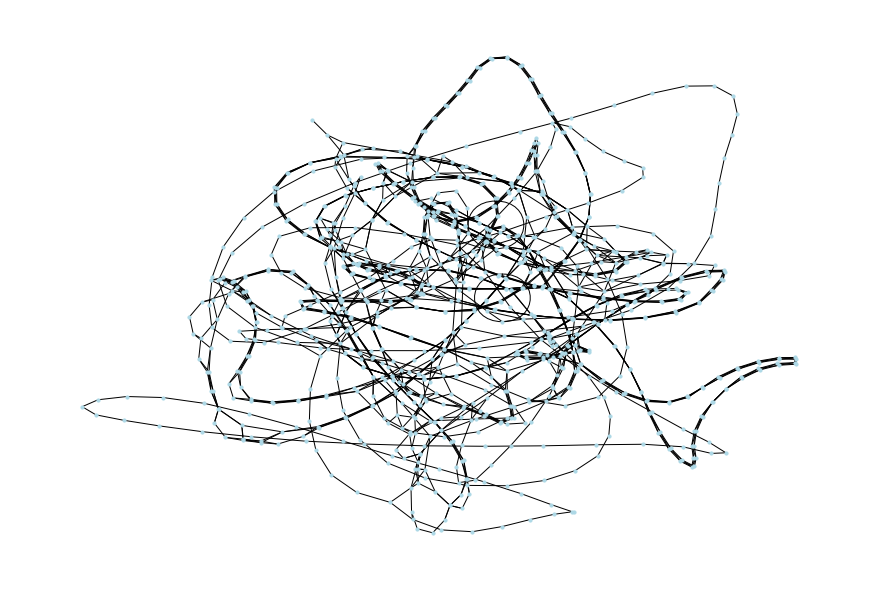

In [87]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'black'
}

nx.draw(G, **graph_options)
plt.show()

In [88]:
weighting = {'school': 1,
             'gender':1.5,
             'age':0.5,
             'address':1,
             'famsize':0.5,
             'Pstatus':1.5,
             'Medu':1,
             'Fedu':1,
             'Mjob':1.5,
             'Fjob':1.5,
             'reason':0.5,
             'guardian':1,
             'traveltime':0.5,
             'studytime':1,
             'failures':1,
             'schoolsup':1,
             'famsup':1,
             'paid':0.5,
             'activities':1,
             'nursery':0.5,
             'higher':0.5,
             'internet':1.5,
             'romantic':1,
             'famrel':1.5,
             'freetime':0.5,
             'goout':1,
             'Dalc':1.5,
             'Walc':1.5,
             'health':1,
             'absences':1,
             'G1':0.5,
             'G2':0.5,
             'G3':0.5,
             'course':0.5,
             'alc':1.5,
             'Names':0
            }


In [89]:
columns_name = list(data.columns)
list_of_scores = []
for vec in range(1, data_vec.shape[0]):
    for vecs in range(data_vec.shape[0]):
        list_difference = []
        score = 0
        for col in range(data_vec.shape[1]):
            if data_vec[vec - 1, col-1] != data_vec[vecs, col-1]:
                score += weighting[columns_name[col]]
                list_of_scores.append(score)
        
        if score < 10.5:
            G.add_edge(data_vec[vec, -1], data_vec[vecs, -1])
        else: 
            pass
    

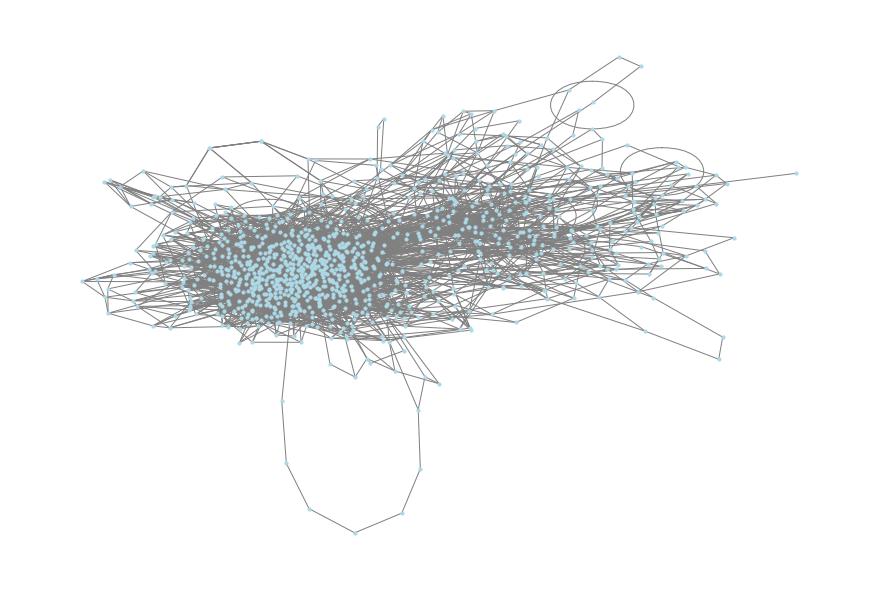

In [90]:
plt.figure(figsize=(12, 8))
graph_options = {
    'node_color': 'lightblue',
    'node_size' : 10,
    "edge_color": 'grey'
}

nx.draw(G, **graph_options, label=True)
plt.show()

In [91]:
print(f"Len: {len(list_of_scores)}")
print(f"Mean: {round(np.mean(list_of_scores), 4)}")
print(f"Median: {np.median(list_of_scores)}")
print(f"Max: {np.max(list_of_scores)}")
print(f"Min: {np.min(list_of_scores)}")

Len: 22202023
Mean: 10.7543
Median: 10.5
Max: 32.5
Min: 0.5


In [92]:
partition = community_louvain.best_partition(G)
len(partition)

1046

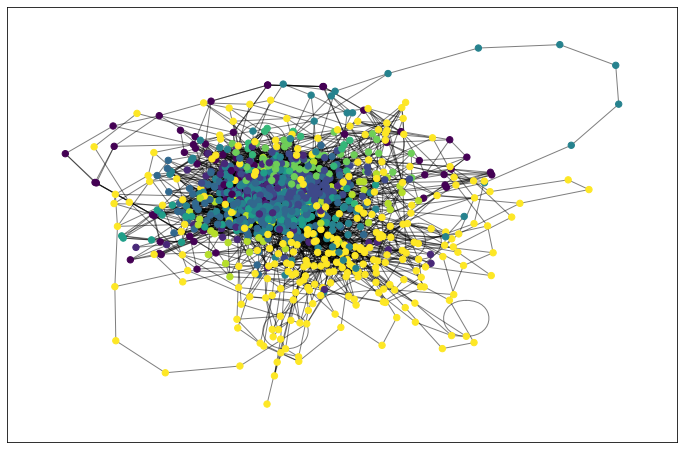

In [93]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

In [94]:
set(partition.values())
# Donc il y a 10 communautés ?

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [95]:
partition_sort = collections.OrderedDict(sorted(partition.items()))
partition_sort

OrderedDict([(0, 4),
             (1, 4),
             (2, 4),
             (3, 1),
             (4, 1),
             (5, 2),
             (6, 3),
             (7, 4),
             (8, 4),
             (9, 2),
             (10, 2),
             (11, 2),
             (12, 2),
             (13, 7),
             (14, 7),
             (15, 2),
             (16, 2),
             (17, 2),
             (18, 3),
             (19, 1),
             (20, 2),
             (21, 2),
             (22, 2),
             (23, 2),
             (24, 2),
             (25, 2),
             (26, 5),
             (27, 5),
             (28, 7),
             (29, 7),
             (30, 2),
             (31, 2),
             (32, 2),
             (33, 2),
             (34, 2),
             (35, 2),
             (36, 2),
             (37, 2),
             (38, 2),
             (39, 2),
             (40, 6),
             (41, 6),
             (42, 2),
             (43, 2),
             (44, 7),
             (45, 7)

In [96]:
partition_sorted = dict(sorted(partition.items()))
partition_sorted

{0: 4,
 1: 4,
 2: 4,
 3: 1,
 4: 1,
 5: 2,
 6: 3,
 7: 4,
 8: 4,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 7,
 14: 7,
 15: 2,
 16: 2,
 17: 2,
 18: 3,
 19: 1,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 5,
 27: 5,
 28: 7,
 29: 7,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 6,
 41: 6,
 42: 2,
 43: 2,
 44: 7,
 45: 7,
 46: 7,
 47: 7,
 48: 7,
 49: 7,
 50: 8,
 51: 8,
 52: 8,
 53: 8,
 54: 8,
 55: 8,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 61: 8,
 62: 8,
 63: 8,
 64: 8,
 65: 8,
 66: 8,
 67: 8,
 68: 8,
 69: 8,
 70: 4,
 71: 4,
 72: 4,
 73: 4,
 74: 7,
 75: 7,
 76: 7,
 77: 7,
 78: 4,
 79: 4,
 80: 4,
 81: 4,
 82: 3,
 83: 3,
 84: 8,
 85: 8,
 86: 8,
 87: 4,
 88: 4,
 89: 3,
 90: 4,
 91: 4,
 92: 3,
 93: 3,
 94: 3,
 95: 3,
 96: 3,
 97: 3,
 98: 2,
 99: 2,
 100: 2,
 101: 2,
 102: 2,
 103: 2,
 104: 2,
 105: 2,
 106: 2,
 107: 2,
 108: 2,
 109: 2,
 110: 1,
 111: 1,
 112: 1,
 113: 1,
 114: 1,
 115: 2,
 116: 2,
 117: 2,
 118: 4,
 119: 5,
 120: 5,
 121: 5,
 122: 5,
 12

In [97]:
partition_sorted = pd.DataFrame.from_dict(partition_sorted, orient="index")

In [98]:
partition_sorted

,0
0,4
1,4
2,4
3,1
4,1
...,...
1041,9
1042,9
1043,9
1044,9


In [99]:
data = pd.concat([data, partition_sorted], axis=1)

In [100]:
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,0
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,1,5,6,6.0,mat,2,0,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6.0,mat,2,1,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10.0,mat,5,2,4
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,1,15,14,15.0,mat,2,3,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,1,6,10,10.0,mat,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,1,11,12,9.0,por,2,1041,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,1,10,10,10.0,por,7,1042,9
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,1,10,11,11.0,por,7,1043,9
1044,M,23,U,GT3,T,4,4,other,other,other,...,4,2,12,15,13,NaN,NaN,8,1044,9


In [101]:
data.rename({0:"Community"}, axis=1, inplace=True)

In [102]:
data

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,Community
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,1,5,6,6.0,mat,2,0,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,1,5,5,6.0,mat,2,1,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,3,1,7,8,10.0,mat,5,2,4
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,5,1,15,14,15.0,mat,2,3,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,5,1,6,10,10.0,mat,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,5,1,11,12,9.0,por,2,1041,9
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,2,1,10,10,10.0,por,7,1042,9
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,5,1,10,11,11.0,por,7,1043,9
1044,M,23,U,GT3,T,4,4,other,other,other,...,4,2,12,15,13,NaN,NaN,8,1044,9


In [103]:
data[data['Community'] == 0]

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,Community
149,GP,M,15,U,LE3,A,2,1,services,other,...,5,5,0,8,9,10.0,mat,7,149,0
150,GP,M,18,U,LE3,T,1,1,other,other,...,5,4,0,6,5,0.0,mat,7,150,0
151,GP,M,16,U,LE3,T,2,1,at_home,other,...,5,5,1,12,13,14.0,mat,8,151,0
152,GP,F,15,R,GT3,T,3,3,services,services,...,3,3,1,10,10,10.0,mat,5,152,0
153,GP,M,19,U,GT3,T,3,2,services,at_home,...,1,4,0,5,0,0.0,mat,2,153,0
154,GP,F,17,U,GT3,T,4,4,other,teacher,...,1,4,0,11,11,12.0,mat,2,154,0
155,GP,M,15,R,GT3,T,2,3,at_home,services,...,1,1,1,11,8,8.0,mat,2,155,0
156,GP,M,17,R,LE3,T,1,2,other,other,...,3,5,1,16,12,13.0,mat,6,156,0
157,GP,F,18,R,GT3,T,1,1,at_home,other,...,5,4,1,9,8,10.0,mat,6,157,0
158,GP,M,16,R,GT3,T,2,2,at_home,other,...,2,3,1,17,15,15.0,mat,3,158,0


In [104]:
data[data['Community'] == 0].describe()

,Medu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,alc,Names,Community
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.0
mean,2.103448,1.724138,1.396552,3.896552,3.327586,3.448276,1.655172,3.224138,4.051724,1.344828,9.431034,9.482759,9.224138,4.879310,412.396552,0.0
std,1.020658,0.913699,0.647252,0.741966,0.998032,1.339971,0.784761,1.451474,1.190937,3.337988,2.847665,2.891253,3.843624,1.929254,232.580787,0.0
min,0.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,2.000000,149.000000,0.0
25%,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,2.000000,3.000000,0.000000,7.000000,8.000000,8.000000,3.000000,163.250000,0.0
50%,2.000000,1.000000,1.000000,4.000000,3.000000,4.000000,1.500000,4.000000,5.000000,1.000000,9.000000,9.500000,10.000000,5.000000,556.500000,0.0
75%,3.000000,2.000000,2.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,1.000000,11.000000,11.000000,11.750000,6.000000,570.750000,0.0
max,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,16.000000,17.000000,15.000000,16.000000,8.000000,952.000000,0.0


In [105]:
community_1 = data[data['Community'] == 0].copy()
community_2 = data[data['Community'] == 1].copy()
community_3 = data[data['Community'] == 2].copy()
community_4 = data[data['Community'] == 3].copy()
community_5 = data[data['Community'] == 4].copy()
community_6 = data[data['Community'] == 5].copy()
community_7 = data[data['Community'] == 6].copy()
community_8 = data[data['Community'] == 7].copy()
community_9 = data[data['Community'] == 8].copy()
community_10 = data[data['Community'] == 9].copy()

In [106]:
print(community_1["alc"].mean())
print(community_2["alc"].mean())
print(community_3["alc"].mean())
print(community_4["alc"].mean())
print(community_5["alc"].mean())
print(community_6["alc"].mean())
print(community_7["alc"].mean())
print(community_8["alc"].mean())
print(community_9["alc"].mean())
print(community_10["alc"].mean())

4.879310344827586
3.753846153846154
3.1354838709677417
3.7633136094674557
3.642857142857143
3.1914893617021276
3.875
3.5892857142857144
4.610169491525424
3.9850187265917603


In [107]:
data[(data["school"] != "GP") & (data["school"] != "MS")]

,school,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,course,alc,Names,Community
1044,M,23,U,GT3,T,4,4,other,other,other,...,4,2,12,15,13,NaN,NaN,8,1044,9
1045,F,22,U,LE3,T,3,3,teacher,teacher,course,...,3,15,13,16,14,NaN,NaN,6,1045,9
